<div align="center">
    <h1><b>Wildfire Analysis in California (1984-2023)</b></h1>
</div>

Wildfires have become an increasingly destructive force, devastating landscapes, endangering lives, and costing billions.
As climate change intensifies, understanding the patterns, causes, and seasonal behavior of wildfires is crucial for mitigation and response.

This analysis explores historical wildfire trends and weather correlations to answer key questions: 
1. Are wildfires becoming more frequent over time?
2. How do weather conditions like temperature and wind speed influence fires?
3. Which months experience the most wildfires, and are these patterns changing?

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [32]:
# Loading the dataset
df = pd.read_csv("CA_Weather_Fire_Dataset.csv")
df.head()

,DATE,PRECIPITATION,MAX_TEMP,MIN_TEMP,AVG_WIND_SPEED,FIRE_START_DAY,YEAR,TEMP_RANGE,WIND_TEMP_RATIO,MONTH,SEASON,LAGGED_PRECIPITATION,LAGGED_AVG_WIND_SPEED,DAY_OF_YEAR
0,1984-01-01,0.0,79.0,51.0,4.70,False,1984,28.0,0.059494,1,Winter,0.0,4.700,1
1,1984-01-02,0.0,71.0,46.0,5.59,False,1984,25.0,0.078732,1,Winter,0.0,5.145,2
2,1984-01-03,0.0,70.0,47.0,5.37,False,1984,23.0,0.076714,1,Winter,0.0,5.220,3
3,1984-01-04,0.0,76.0,45.0,4.70,False,1984,31.0,0.061842,1,Winter,0.0,5.090,4
4,1984-01-05,0.0,74.0,49.0,5.14,False,1984,25.0,0.069459,1,Winter,0.0,5.100,5


In [33]:
# missing values
df.isnull().sum()

DATE                      0
PRECIPITATION             1
MAX_TEMP                  1
MIN_TEMP                  1
AVG_WIND_SPEED           12
FIRE_START_DAY            0
YEAR                      0
TEMP_RANGE                1
WIND_TEMP_RATIO          12
MONTH                     0
SEASON                    0
LAGGED_PRECIPITATION      0
LAGGED_AVG_WIND_SPEED     0
DAY_OF_YEAR               0
dtype: int64

In [34]:
df = df.dropna()
df.isnull().sum()

DATE                     0
PRECIPITATION            0
MAX_TEMP                 0
MIN_TEMP                 0
AVG_WIND_SPEED           0
FIRE_START_DAY           0
YEAR                     0
TEMP_RANGE               0
WIND_TEMP_RATIO          0
MONTH                    0
SEASON                   0
LAGGED_PRECIPITATION     0
LAGGED_AVG_WIND_SPEED    0
DAY_OF_YEAR              0
dtype: int64

In [35]:
df.describe()

,PRECIPITATION,MAX_TEMP,MIN_TEMP,AVG_WIND_SPEED,YEAR,TEMP_RANGE,WIND_TEMP_RATIO,MONTH,LAGGED_PRECIPITATION,LAGGED_AVG_WIND_SPEED,DAY_OF_YEAR
count,14976.000000,14976.000000,14976.000000,14976.000000,14976.000000,14976.000000,14976.000000,14976.000000,14976.000000,14976.000000,14976.000000
mean,0.032338,70.540932,56.499666,7.435098,2004.006010,14.041266,0.107019,6.518096,0.226366,7.434007,182.986245
std,0.179607,7.261989,6.766055,2.129985,11.837186,5.996128,0.035630,3.449663,0.648934,1.384969,105.468440
min,0.000000,50.000000,33.000000,1.790000,1984.000000,2.000000,0.023553,1.000000,0.000000,3.227143,1.000000
25%,0.000000,65.000000,51.000000,6.040000,1994.000000,10.000000,0.085238,4.000000,0.000000,6.518571,92.000000
50%,0.000000,70.000000,57.000000,7.160000,2004.000000,12.000000,0.102222,7.000000,0.000000,7.478571,183.000000
75%,0.000000,75.000000,62.000000,8.500000,2014.000000,17.000000,0.120462,10.000000,0.060000,8.278571,274.000000
max,4.530000,106.000000,77.000000,26.170000,2025.000000,41.000000,0.459123,12.000000,8.180000,13.932857,366.000000


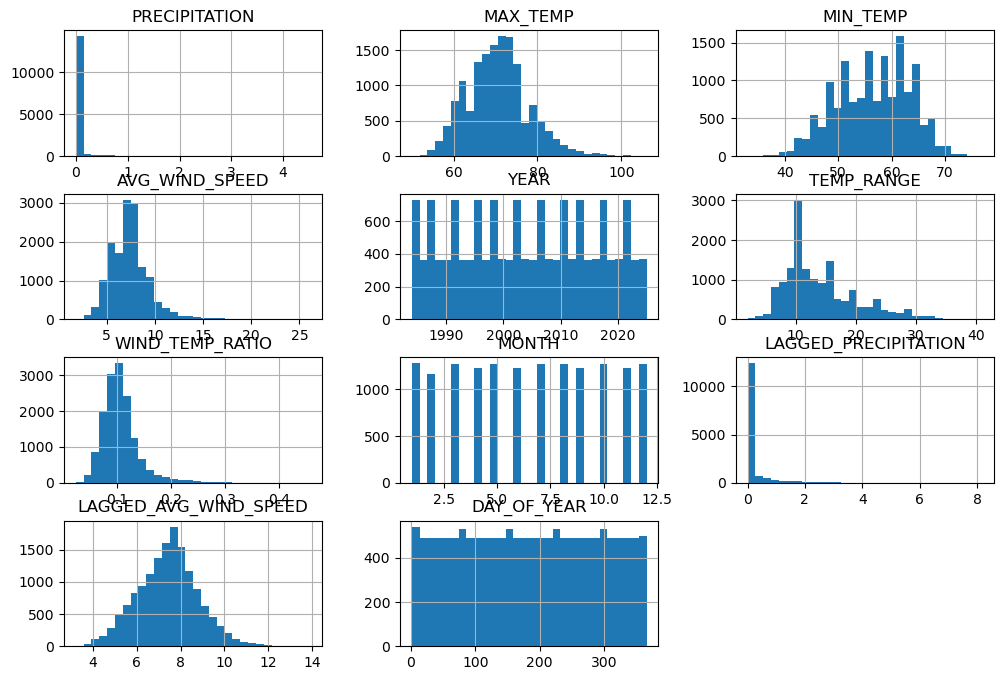

In [36]:
# Histograms for numerical columns
df.hist(figsize=(12, 8), bins=30)
plt.show()

In [37]:
# Convert date to datetime format
df['DATE'] = pd.to_datetime(df['DATE'])
df['YEAR'] = df['DATE'].dt.year

## 1. Are wildfires becoming more frequent over time?
### Time Series Analysis: Annual Wildfire Trends

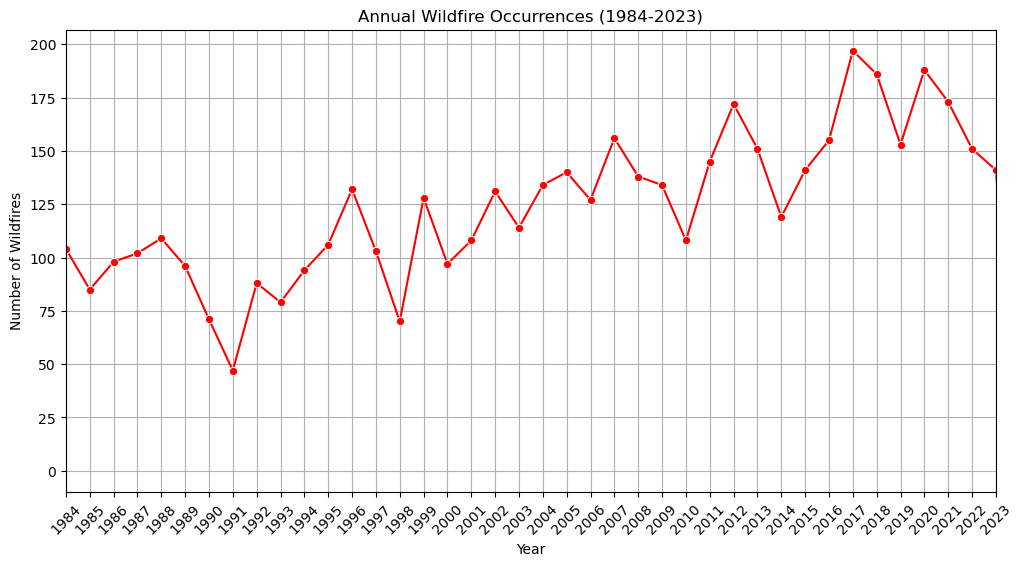

In [38]:
yearly_fires = df.groupby(df['DATE'].dt.year)["FIRE_START_DAY"].sum()

# Plot Annual Wildfire Trends with all years displayed on the X-axis
plt.figure(figsize=(12,6))
ax = sns.lineplot(x=yearly_fires.index, y=yearly_fires.values, marker="o", color="red")

# Set X-axis ticks to show all years
ax.set_xticks(yearly_fires.index)  # Show all years
ax.set_xticklabels(yearly_fires.index, rotation=45)

ax.set_xlim([1984, 2023])

plt.title("Annual Wildfire Occurrences (1984-2023)")
plt.xlabel("Year")
plt.ylabel("Number of Wildfires")
plt.grid()
plt.show()

## 2. How do weather conditions like temperature and wind speed influence fires?
### Heatmap: Correlation Between Weather and Wildfires

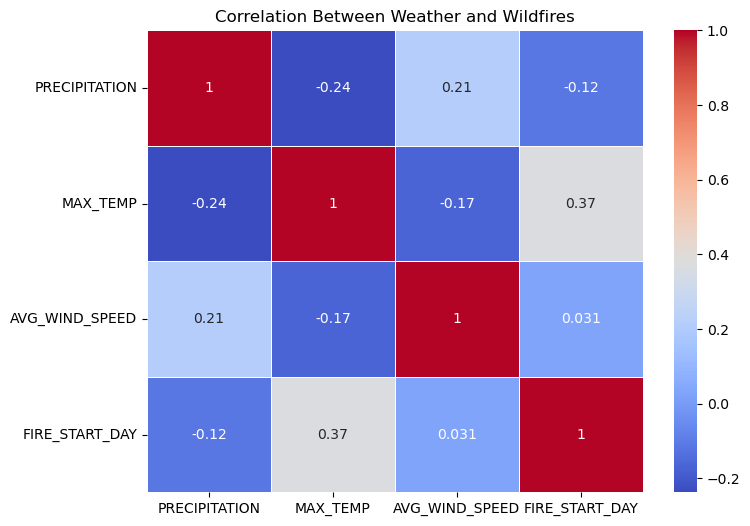

In [39]:
correlation_matrix = df[['PRECIPITATION', 'MAX_TEMP', 'AVG_WIND_SPEED', 'FIRE_START_DAY']].corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Between Weather and Wildfires")
plt.show()

## 3. Which months experience the most wildfires, and are these patterns changing?
### Bar Graph: Monthly Wildfire Trends

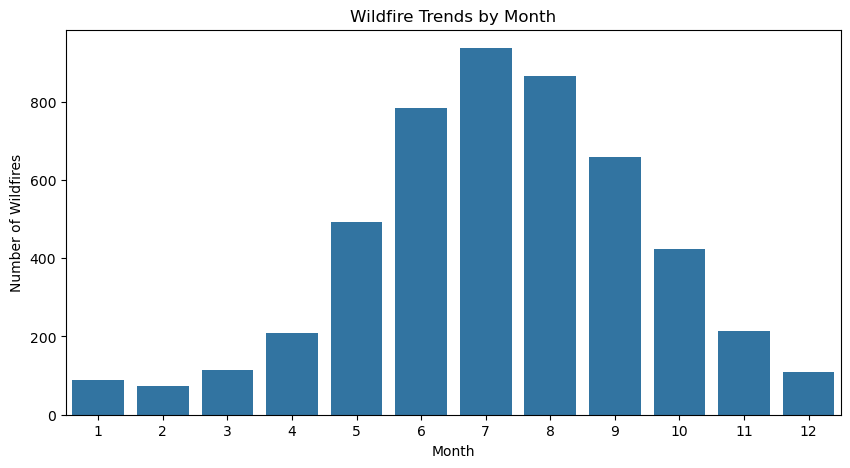

In [40]:
df['MONTH'] = df['DATE'].dt.month

# Count wildfires per month
monthly_fires = df.groupby("MONTH")["FIRE_START_DAY"].sum()

# Plot
plt.figure(figsize=(10,5))
sns.barplot(x=monthly_fires.index, y=monthly_fires.values)
plt.xlabel("Month")
plt.ylabel("Number of Wildfires")
plt.title("Wildfire Trends by Month")
plt.show()

## Hypothesis Testing (Does Temperature Affect Wildfires?)
- Define Hypothesis
    - H₀ (Null Hypothesis): High temperatures do not significantly increase wildfires.
    - H₁ (Alternative Hypothesis): High temperatures increase wildfire risk.
- Performing T-test (If P-value < 0.05, temperature significantly impacts wildfire risk)

In [41]:
from scipy.stats import ttest_ind

# Split data into fire vs. non-fire days
high_temp_fires = df[df['MAX_TEMP'] > df['MAX_TEMP'].median()]['FIRE_START_DAY']
low_temp_fires = df[df['MAX_TEMP'] <= df['MAX_TEMP'].median()]['FIRE_START_DAY']

# Perform t-test
t_stat, p_value = ttest_ind(high_temp_fires, low_temp_fires, equal_var=False)
print(f"T-Statistic: {t_stat:.3f}, P-Value: {p_value:.5f}")

# Interpretation
if p_value < 0.05:
    print("High temperatures significantly increase wildfire risk.")
else:
    print("No strong evidence that temperature affects wildfires.")

T-Statistic: 44.881, P-Value: 0.00000
High temperatures significantly increase wildfire risk.


# Key Takeaways
### - Wildfires are increasing over time, particularly in recent years.
### - Temperature & wind speed play a crucial role in wildfire occurrences.
### - Most wildfires occur between June and September.